# Chapter 09 - Multimodal Large Language Models

## OpenCLIP

In [1]:
from urllib.request import urlopen
from PIL import Image

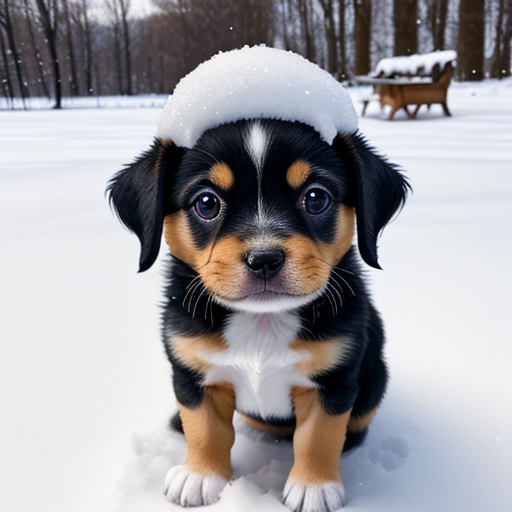

In [2]:
# Load an AI-generated image of a puppy playing in the show
puppy_path = "https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/chapter09/images/puppy.png"
image = Image.open(urlopen(puppy_path)).convert("RGB")
image

In [3]:
caption = "a puppy playing in the snow"

### Generate embeddings with OpenCLIP

In [4]:
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel

c:\Users\francisco.procopio\OneDrive - luminiitsolutions.com\Documentos\GenAI-for-developers\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model_id = "openai/clip-vit-base-patch32"

# Load a tokenizer to preprocess the text
clip_tokenizer = CLIPTokenizerFast.from_pretrained(model_id)

# Load a processor to preprocess the images
clip_processor = CLIPProcessor.from_pretrained(model_id)

# Main model for generating text and image embeddings
model = CLIPModel.from_pretrained(model_id)

In [6]:
# Tokenize our input
inputs =clip_tokenizer(caption, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[49406,   320,  6829,  1629,   530,   518,  2583, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


In [7]:
clip_tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

['<|startoftext|>',
 'a</w>',
 'puppy</w>',
 'playing</w>',
 'in</w>',
 'the</w>',
 'snow</w>',
 '<|endoftext|>']

In [8]:
# Create a text embedding
text_embedding = model.get_text_features(**inputs)

In [9]:
text_embedding.shape

torch.Size([1, 512])

In [10]:
# Preprocess image
processed_image = clip_processor(
    text=None, images=image, return_tensors="pt"
)['pixel_values']

In [11]:
processed_image.shape

torch.Size([1, 3, 224, 224])

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Prepare image for visualization
img = processed_image.squeeze(0)
img = img.permute(*torch.arange(img.ndim - 1, -1, -1))
img = np.einsum("ijk->jik", img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..2.145897].


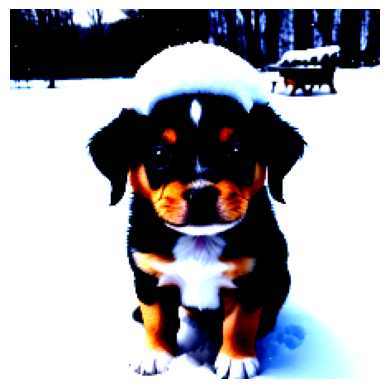

In [14]:
# Visualize preprocessed image
plt.imshow(img)
plt.axis('off')

plt.show()

In [15]:
# Create the image embedding
image_embedding = model.get_image_features(processed_image)
image_embedding.shape

torch.Size([1, 512])

In [17]:
# Normalize the embeddings
text_embedding /= text_embedding.norm(dim=-1, keepdim=True)
image_embedding /= image_embedding.norm(dim=-1, keepdim=True)

In [20]:
# Calculate their similarity
text_embedding = text_embedding.detach().cpu().numpy()
image_embedding = image_embedding.detach().cpu().numpy()

In [21]:
score = np.dot(
    text_embedding,
    image_embedding.T
)
score

array([[0.33149642]], dtype=float32)